# Convolution Neural Network
### Assignment 3 - Task-2 DL6910
**Image classification using a CNN with CL1, PL1, CL2 and PL2 as the layers. Use kernels of size 3x3, stride of 1 in the convolutional layers. Use mean pooling with a kernel size of 2x2 and stride of 2 in the pooling layers. Use 4 feature maps in CL1 and 16 feature maps in CL2.**
* CL - Convolution Layer
* PL - Pooling Layer 

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
import cv2

In [4]:
print(cv2.__version__)

4.1.2


### Data

In [5]:
!unrar x "/content/Used data set - Copy"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Used data set - Copy.rar

Creating    Used data set - Copy                                      OK
Creating    Used data set - Copy/002.laysan albatross                 OK
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0001_545.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0002_1027.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0003_1033.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0004_930.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0005_565.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0006_702.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0012_696.jpg     

### Exploratory Data Analysis

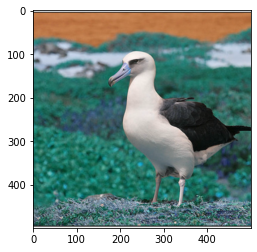

In [6]:
DATADIR="Used data set - Copy"
CATEGORIES=["002.laysan albatross","010.red winged blackbird","041.scissor tailed flycatcher","114.black throated sparrow",
            "126.nelson sharp tailed sparrow","130.tree sparrow","151.black capped vireo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [8]:
print(img_array.shape)

(500, 500, 3)


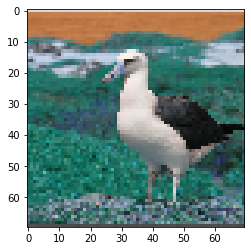

In [78]:
img_size=70
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [79]:
training_data=[]
img_size=70

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
                
            except Exception as e:
                pass
            
create_training_data()

In [80]:
print(len(training_data))

410


In [81]:
a=training_data[0][0]
a.shape

(70, 70, 3)

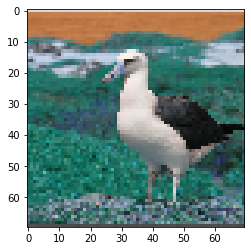

In [82]:
plt.imshow(a)

In [83]:
import random
random.shuffle(training_data)

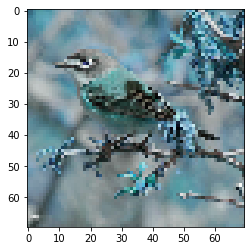

In [84]:
b=training_data[0][0]
plt.imshow(b)

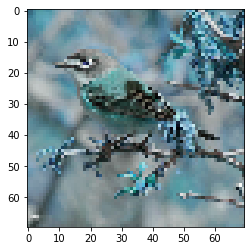

In [85]:
img_size=70
new_array=cv2.resize(b,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [86]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,70,70,3)

### Saving the data after Feature Engineering

In [87]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [88]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

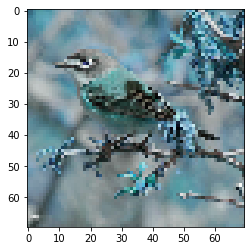

In [89]:
plt.imshow(X[0])

In [90]:
import pickle
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

### Categorization

In [91]:
from tensorflow.keras.utils import to_categorical

In [92]:
y=to_categorical(y,7)

In [93]:
y[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [94]:
X=X/255

In [95]:
s=X[0]
s.max()

0.984313725490196

In [96]:
X.shape

(410, 70, 70, 3)

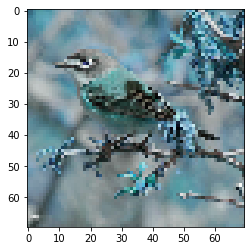

In [97]:

plt.imshow(s)

### Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.125,random_state=142)

In [101]:
X_train.shape

(287, 70, 70, 3)

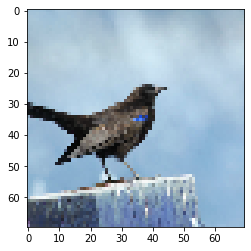

In [102]:
plt.imshow(X_train[0])

In [103]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [104]:
X_validate.shape

(41, 70, 70, 3)

In [105]:
X_test.shape

(82, 70, 70, 3)

### Saving Data after Categorization and Train Test Split
Saving data at regular interval is good as it avoids doing fresh start.

In [106]:
import pickle

pickle_out=open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("X_validate.pickle","wb")
pickle.dump(X_validate,pickle_out)
pickle_out.close()

pickle_out=open("y_validate.pickle","wb")
pickle.dump(y_validate,pickle_out)
pickle_out.close()


pickle_out=open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [142]:
import pickle
X_train=pickle.load(open("X_train.pickle","rb"))
y_train=pickle.load(open("y_train.pickle","rb"))

X_validate=pickle.load(open("X_validate.pickle","rb"))
y_validate=pickle.load(open("y_validate.pickle","rb"))

X_test=pickle.load(open("X_test.pickle","rb"))
y_test=pickle.load(open("y_test.pickle","rb"))


In [143]:
X_train.shape

(287, 70, 70, 3)

### Importing Tensorflow and Keras Libraries

In [144]:
import tensorflow as tf
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU

## Model Architecture

In [145]:
# Model Making
model=Sequential()
model.add(Conv2D(filters=4,kernel_size=(3,3),input_shape=(70,70,3)))
model.add(LeakyReLU(alpha=0.1))


model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=16,kernel_size=(3,3)))
model.add(LeakyReLU(alpha=0.1))


model.add(AveragePooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Flatten( ))

model.add(Dense(2100))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.7))
model.add(BatchNormalization())

model.add(Dense(700))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(BatchNormalization())


model.add(Dense(70))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#output layer
model.add(Dense(7,activation='softmax'))

epochs = 250
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=True)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy'], loss_weights=[1], optimizer=sgd, metrics=['accuracy'])
# summarize model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 68, 68, 4)         112       
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 68, 68, 4)         0         
_________________________________________________________________
average_pooling2d_16 (Averag (None, 34, 34, 4)         0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 34, 34, 4)         16        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 16)        592       
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 32, 32, 16)        0         
_________________________________________________________________
average_pooling2d_17 (Averag (None, 16, 16, 16)       

### Training the Model

In [146]:
history = model.fit(X_train, y_train, validation_data=(X_validate,y_validate), epochs=epochs, batch_size=16, callbacks=[lr_sc])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/250
18/18 [==============================] - 0s 22ms/step - loss: 2.4787 - accuracy: 0.1812 - val_loss: 11.5795 - val_accuracy: 0.0976 - lr: 0.0100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
Epoch 2/250
18/18 [==============================] - 0s 9ms/step - loss: 2.0395 - accuracy: 0.2718 - val_loss: 15.4601 - val_accuracy: 0.1220 - lr: 0.0100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
Epoch 3/250
18/18 [==============================] - 0s 10ms/step - loss: 1.8442 - accuracy: 0.3066 - val_loss: 5.5646 - val_accuracy: 0.1707 - lr: 0.0100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
Epoch 4/250
18/18 [==============================] - 0s 12ms/step - loss: 1.7710 - accuracy: 0.2892 - val_loss: 3.1385 - val_accuracy: 0.2195 - lr: 0.0100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
Epoch 5/250
18/18 [====================

### Evaluation

In [149]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,2.478740,0.181185,11.579500,0.097561,0.010000
1,2.039516,0.271777,15.460062,0.121951,0.010000
2,1.844186,0.306620,5.564556,0.170732,0.010000
3,1.770966,0.289199,3.138508,0.219512,0.010000
4,1.801518,0.310105,2.292446,0.268293,0.010000
...,...,...,...,...,...
245,0.024979,0.996516,2.956918,0.463415,0.002939
246,0.049787,0.975610,2.965864,0.439024,0.002939
247,0.016292,1.000000,3.020995,0.463415,0.002821
248,0.013295,1.000000,3.003497,0.463415,0.002821


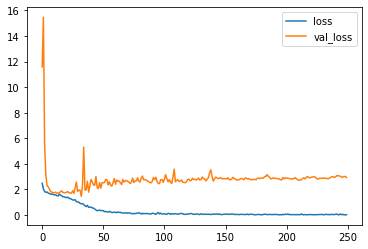

In [150]:
metrics[['loss','val_loss']].plot()

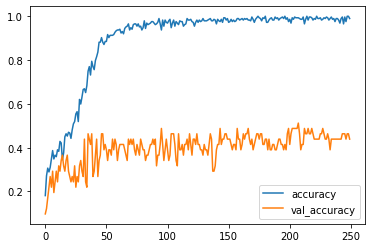

In [151]:
metrics[['accuracy','val_accuracy']].plot()

In [152]:
model.metrics_names

['loss', 'accuracy']

### Saving the Final Trained Model

In [153]:
model.save('DL_ASSIGN_3_TASK_2.h5')

In [154]:
from tensorflow.keras.models import load_model

In [155]:
Final_model=load_model('DL_ASSIGN_3_TASK_2.h5')

In [156]:
a=X_test[:5]
b=y_test[:5]
c=Final_model.predict_classes(a)
c=to_categorical(c,7)
c

array([[0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

#### Classification Report & Confusion Matrix

In [157]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [158]:
predictions=Final_model.predict_classes(X_test)
predictions=to_categorical(predictions,7)

In [159]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.27      0.46      0.34        13
           1       0.69      0.69      0.69        13
           2       0.57      0.31      0.40        13
           3       0.13      0.25      0.17         8
           4       0.50      0.38      0.43        13
           5       0.50      0.23      0.32        13
           6       0.33      0.33      0.33         9

   micro avg       0.39      0.39      0.39        82
   macro avg       0.43      0.38      0.38        82
weighted avg       0.45      0.39      0.40        82
 samples avg       0.39      0.39      0.39        82



In [160]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [161]:
y_test[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [162]:
print(multilabel_confusion_matrix(y_test,predictions))

[[[53 16]
  [ 7  6]]

 [[65  4]
  [ 4  9]]

 [[66  3]
  [ 9  4]]

 [[61 13]
  [ 6  2]]

 [[64  5]
  [ 8  5]]

 [[66  3]
  [10  3]]

 [[67  6]
  [ 6  3]]]


#### Prediction

In [163]:
multilabel_confusion_matrix(y_test,predictions)[0]

array([[53, 16],
       [ 7,  6]])

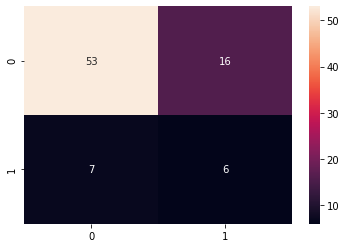

In [164]:
import seaborn as sns
sns.heatmap(multilabel_confusion_matrix(y_test,predictions)[0],annot=True)

## Done !